In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = 'data/experiment-speedlimit.csv'
df = pd.read_csv(file_path)

# 使用numpy分割数据框
num_cols = df.shape[1]
split_dfs = np.split(df, num_cols // 4, axis=1)

# 删除每组的第一个元素（列）
split_dfs = [df_group.drop(df_group.columns[0], axis=1) for df_group in split_dfs]

# 创建一个字典，将键从20分配给每个组,观测范围
result_dict = {}
key_start = 1

for i, split_df in enumerate(split_dfs):
    # 将数据框转换为列表形式
    split_list = split_df.values.tolist()
    # 将列表存储到字典中
    key = key_start + i*0.05
    key_r = round(key,2)
    result_dict[key_r] = split_list

# 显示最终字典
print(result_dict)

{1.0: [[11, 0, 3]], 1.05: [[7, 0, 6]], 1.1: [[7, 0, 10]], 1.15: [[7, 0, 6]], 1.2: [[16, 0, 6]], 1.25: [[11, 0, 9]], 1.3: [[9, 0, 6]], 1.35: [[17, 0, 15]], 1.4: [[11, 0, 8]], 1.45: [[16, 0, 5]], 1.5: [[11, 0, 8]], 1.55: [[16, 0, 9]], 1.6: [[12, 0, 8]], 1.65: [[11, 0, 8]], 1.7: [[13, 0, 7]], 1.75: [[11, 0, 6]], 1.8: [[12, 0, 7]], 1.85: [[9, 0, 10]], 1.9: [[12, 0, 13]], 1.95: [[8, 0, 9]], 2.0: [[16, 0, 5]], 2.05: [[10, 0, 3]], 2.1: [[6, 0, 7]], 2.15: [[14, 0, 9]], 2.2: [[11, 0, 15]], 2.25: [[8, 0, 8]], 2.3: [[13, 1, 8]], 2.35: [[6, 0, 11]], 2.4: [[10, 0, 8]], 2.45: [[12, 0, 5]], 2.5: [[10, 1, 4]], 2.55: [[11, 2, 9]], 2.6: [[9, 1, 8]], 2.65: [[15, 2, 5]], 2.7: [[11, 0, 4]], 2.75: [[6, 0, 10]], 2.8: [[15, 0, 13]], 2.85: [[10, 0, 7]], 2.9: [[7, 0, 8]], 2.95: [[8, 1, 16]], 3.0: [[12, 0, 5]], 3.05: [[13, 3, 15]], 3.1: [[8, 0, 7]], 3.15: [[7, 2, 8]], 3.2: [[11, 0, 7]], 3.25: [[11, 0, 7]], 3.3: [[10, 2, 12]], 3.35: [[13, 1, 6]], 3.4: [[12, 0, 11]], 3.45: [[10, 1, 11]], 3.5: [[10, 1, 8]], 3.55: [

/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


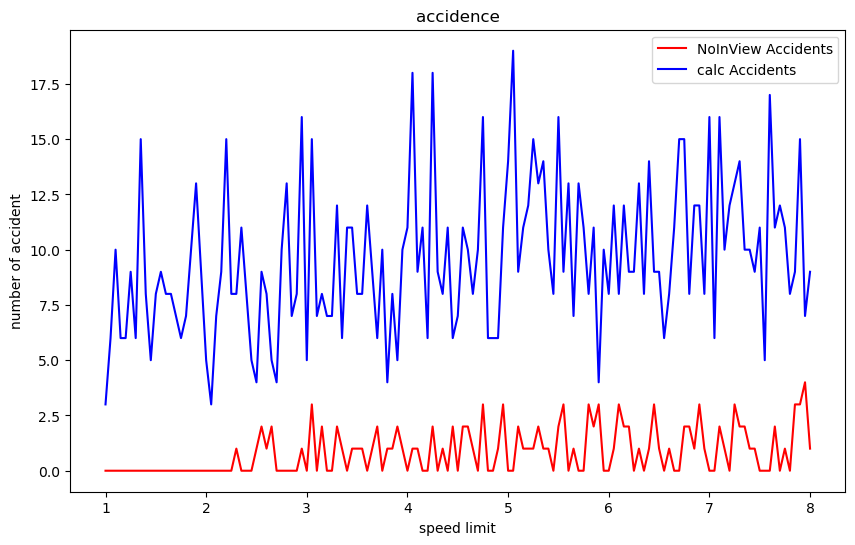

In [5]:
# 提取x轴（keys）和y轴（每个list的第二个元素）
x_values = list(result_dict.keys())
y_values = [value[0][1] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y_values)

# 提取y轴（每个list的第3个元素）
y2_values = [value[0][2] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y2_values)

# 创建图表
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='', linestyle='-', color='r', label='NoInView Accidents')
plt.plot(x_values, y2_values, marker='', linestyle='-', color='b', label='calc Accidents')

# 设置标题和标签
plt.title('accidence')
plt.xlabel('speed limit')
plt.ylabel('number of accident')
plt.legend()

# 显示图表
plt.show()

回归系数 (Slope): 0.5487392439744851
截距 (Intercept): 7.1264180829658805
均方误差 (Mean Squared Error): 10.185205362247425
R² (Coefficient of Determination): 0.1090869309731306
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     17.02
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           6.34e-05
Time:                        15:57:28   Log-Likelihood:                -363.70
No. Observations:                 141   AIC:                             731.4
Df Residuals:                     139   BIC:                             737.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

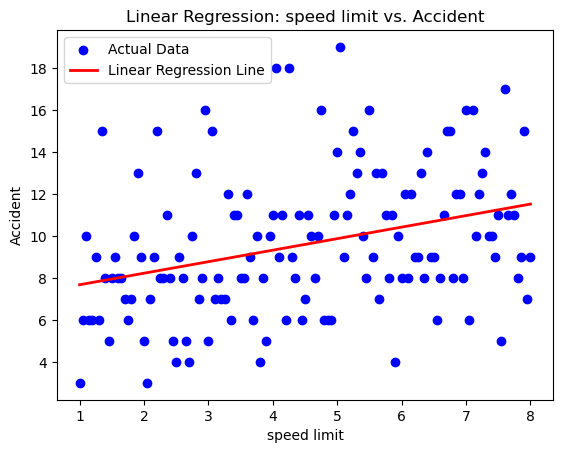

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# 示例数据
# 假设你有两个列表，一个是观测距离，另一个是对应的交通事故概率
observation_distance = np.array(x_values).reshape(-1, 1)
accident_probability = np.array(y2_values)

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(observation_distance, accident_probability)

# 预测值
predicted_probabilities = model.predict(observation_distance)

# 输出回归系数
print(f"回归系数 (Slope): {model.coef_[0]}")
print(f"截距 (Intercept): {model.intercept_}")

# 计算模型性能
mse = mean_squared_error(accident_probability, predicted_probabilities)
r2 = r2_score(accident_probability, predicted_probabilities)
print(f"均方误差 (Mean Squared Error): {mse}")
print(f"R² (Coefficient of Determination): {r2}")

# 使用 statsmodels 计算 p 值
X = sm.add_constant(observation_distance)  # 添加常数项（截距）
model_sm = sm.OLS(accident_probability, X).fit()
print(model_sm.summary())

# 可视化回归结果
plt.scatter(observation_distance, accident_probability, color='blue', label='Actual Data')
plt.plot(observation_distance, predicted_probabilities, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('speed limit')
plt.ylabel('Accident')
plt.title('Linear Regression: speed limit vs. Accident')
plt.legend()
plt.show()

In [7]:
import pandas as pd
import numpy as np

# 示例数据：假设你有一个 DataFrame，包含观察区域和两种事故类型的数量
data = {
    'speed_limit': x_values,  # 观察区域从20到120
    'noInView_accidents': y_values,  # 第一种事故数量数据
    'inView_accidents':  y2_values # 第二种事故数量数据
}

df = pd.DataFrame(data)
df

,speed_limit,noInView_accidents,inView_accidents
0,1.00,0,3
1,1.05,0,6
2,1.10,0,10
3,1.15,0,6
4,1.20,0,6
...,...,...,...
136,7.80,0,8
137,7.85,3,9
138,7.90,3,15
139,7.95,4,7


NoInView Accidents by speed_limit:
speed_limit_bins
(1, 2]     0
(2, 3]     8
(3, 4]    19
(4, 5]    19
(5, 6]    23
(6, 7]    24
(7, 8]    26
Name: noInView_accidents, dtype: int64

InView Accidents by speed_limit:
speed_limit_bins
(1, 2]    161
(2, 3]    163
(3, 4]    175
(4, 5]    201
(5, 6]    221
(6, 7]    214
(7, 8]    215
Name: inView_accidents, dtype: int64


/tmp/ipykernel_18014/4179932179.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_noInView = df.groupby('speed_limit_bins')['noInView_accidents'].sum()
/tmp/ipykernel_18014/4179932179.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_inView = df.groupby('speed_limit_bins')['inView_accidents'].sum()


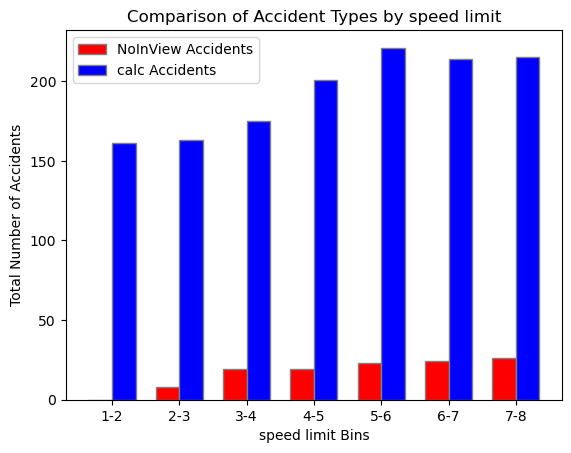

In [9]:
# 将观察区域分段
bins = [1, 2, 3, 4, 5, 6, 7, 8]
df['speed_limit_bins'] = pd.cut(df['speed_limit'], bins)

# 计算每个分段内的事故总和
grouped_noInView = df.groupby('speed_limit_bins')['noInView_accidents'].sum()
grouped_inView = df.groupby('speed_limit_bins')['inView_accidents'].sum()

# 输出分段后的事故总和
print("NoInView Accidents by speed_limit:")
print(grouped_noInView)
print("\nInView Accidents by speed_limit:")
print(grouped_inView)

# 可视化比较
import matplotlib.pyplot as plt

# 绘制柱状图进行比较
width = 0.35
r1 = np.arange(len(grouped_noInView))
r2 = [x + width for x in r1]

plt.bar(r1, grouped_noInView, color='r', width=width, edgecolor='grey', label='NoInView Accidents')
plt.bar(r2, grouped_inView, color='b', width=width, edgecolor='grey', label='calc Accidents')

plt.xlabel('speed limit Bins')
plt.ylabel('Total Number of Accidents')
plt.xticks([r + width/2 for r in range(len(grouped_noInView))], ['1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8'])
plt.title('Comparison of Accident Types by speed limit')
plt.legend()
plt.show()

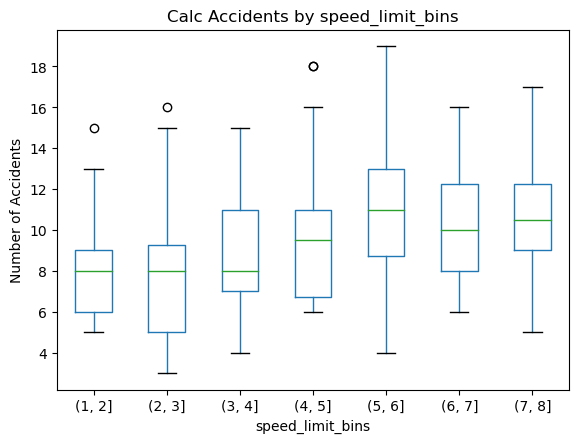

In [10]:
# # 绘制 inView_accidents 的箱线图
# plt.subplot(1, 2, 2)
df.boxplot(column='inView_accidents', by='speed_limit_bins', grid=False)
plt.title('Calc Accidents by speed_limit_bins')
plt.suptitle('')
plt.xlabel('speed_limit_bins')
plt.ylabel('Number of Accidents')

# plt.tight_layout()
plt.show()